In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report, average_precision_score, confusion_matrix

In [64]:
!pip install opendatasets

In [65]:
import opendatasets as od

In [66]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


In [67]:
df = pd.read_csv("/content/creditcardfraud/creditcard.csv")

In [68]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [70]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [71]:
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [72]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [73]:
X = df.drop('Class', axis=1)
y = df['Class']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
count_legit = (y_train == 0).sum()
count_fraud = (y_train == 1).sum()
weight_ratio = count_legit / count_fraud
weight_ratio

np.float64(577.2868020304569)

In [76]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    n_jobs=-1,
    verbose=True,
)

In [77]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:08:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

In [78]:
y_pred = xgb_model.predict(X_test)

In [79]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

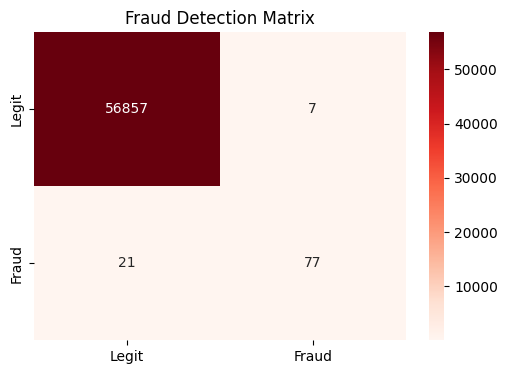

Recall (Fraud Found): 0.79
Precision (True Alarms): 0.92
AUPRC Score: 0.72


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Fraud Detection Matrix')
plt.show()

# 2. The Real Scores
from sklearn.metrics import precision_score, recall_score

print(f"Recall (Fraud Found): {recall_score(y_test, y_pred):.2f}")
print(f"Precision (True Alarms): {precision_score(y_test, y_pred):.2f}")
print(f"AUPRC Score: {average_precision_score(y_test, y_pred):.2f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:08:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


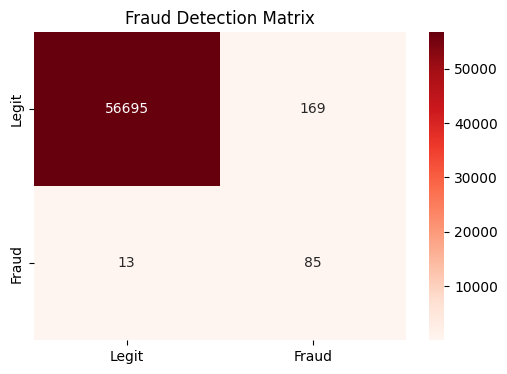

Recall (Fraud Found): 0.87
Precision (True Alarms): 0.33
AUPRC Score: 0.29


In [81]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    scale_pos_weight=weight_ratio,
    n_jobs=-1,
    verbose=True,
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Fraud Detection Matrix')
plt.show()

# 2. The Real Scores
from sklearn.metrics import precision_score, recall_score

print(f"Recall (Fraud Found): {recall_score(y_test, y_pred):.2f}")
print(f"Precision (True Alarms): {precision_score(y_test, y_pred):.2f}")
print(f"AUPRC Score: {average_precision_score(y_test, y_pred):.2f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:11:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


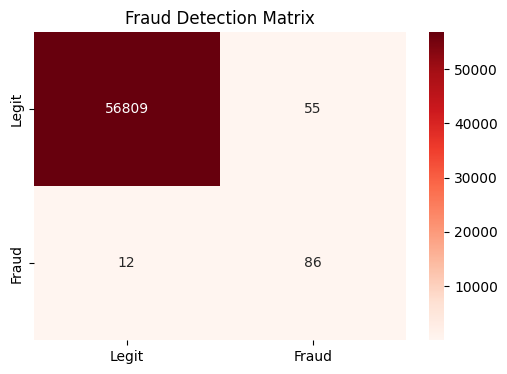

Recall (Fraud Found): 0.88
Precision (True Alarms): 0.61
AUPRC Score: 0.54


In [82]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    scale_pos_weight=100,
    n_jobs=-1,
    verbose=True,
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Fraud Detection Matrix')
plt.show()

# 2. The Real Scores
from sklearn.metrics import precision_score, recall_score

print(f"Recall (Fraud Found): {recall_score(y_test, y_pred):.2f}")
print(f"Precision (True Alarms): {precision_score(y_test, y_pred):.2f}")
print(f"AUPRC Score: {average_precision_score(y_test, y_pred):.2f}")

In [83]:
# Get raw probabilities (0.0 to 1.0)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Set a stricter threshold
threshold = 0.85
y_pred_strict = (y_probs > threshold).astype(int)

print("--- Strict Threshold Results ---")
print(f"Recall: {recall_score(y_test, y_pred_strict):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_strict):.2f}")

--- Strict Threshold Results ---
Recall: 0.82
Precision: 0.77
